In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import load_img
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50

In [43]:
PATH = "C:\data\melanoma"

PATH_TRAIN = PATH + '/train/'
PATH_VALID = PATH + '/valid/'
PATH_TEST = PATH + '/test/'

In [44]:
def dataset(path, type):
    labels = os.listdir(path)
    total = 0
    for label in labels:
        print(label,len(os.listdir(path + label)))
        total += len(os.listdir(path + label))

    print(type,"training photos ", total)
    print ("\n")

dataset(PATH_TRAIN, "train")
dataset(PATH_VALID, "train")
dataset(PATH_TEST, "train")

melanoma 5341
not_melanoma 5341
train training photos  10682


melanoma 1781
not_melanoma 1781
train training photos  3562


melanoma 1781
not_melanoma 1780
train training photos  3561




C:\data\melanoma/train/ photo number 77


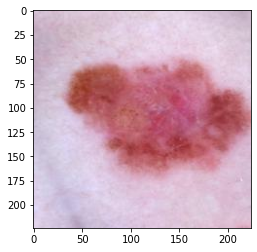

C:\data\melanoma/valid/ photo number 77


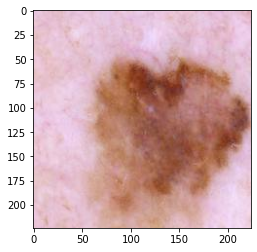

C:\data\melanoma/test/ photo number 77


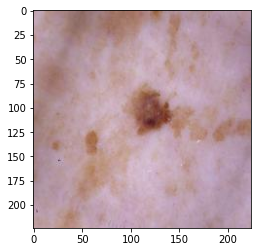

In [45]:
def dataset_display(path, sample, cat):
    image_dir = path + '/' + cat + '/'
    img_name = os.listdir(image_dir)[sample]
    img_path = image_dir + img_name
    img = load_img(img_path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    print(path, "photo number", sample)
    plt.show()

dataset_display(PATH_TRAIN, 77, 'melanoma')
dataset_display(PATH_VALID, 77, 'melanoma')
dataset_display(PATH_TEST, 77, 'melanoma')

In [46]:
conv_base = ResNet50(weights='imagenet',
                     include_top=False,
                     input_shape=(224, 224, 3))

In [47]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_2 (Dropout)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 30,010,434
Trainable params: 29,957,314


In [48]:
model.compile(optimizer=optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_2 (Dropout)         (None, 100352)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                6422592   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 30,010,434
Trainable params: 29,957,314


In [49]:
batch_size = 20
target_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(PATH_TRAIN,
                                              target_size=target_size,
                                              batch_size=batch_size)

valid_gen = test_datagen.flow_from_directory(PATH_VALID,
                                             target_size=target_size,
                                             batch_size=batch_size)

test_gen = test_datagen.flow_from_directory(PATH_TEST,
                                            target_size=target_size,
                                            batch_size=batch_size)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [50]:
history = model.fit_generator(train_gen,
                              epochs=3,
                              steps_per_epoch = 10682 // batch_size,
                              validation_data = valid_gen,
                              validation_steps = 3562 // batch_size)

C:\Users\aiden\AppData\Local\Temp\ipykernel_11688\1325448849.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen,


NameError: name 'scipy' is not defined